In [11]:
import numpy as np
from numpy import load
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from yellowbrick.classifier import PrecisionRecallCurve
import pickle

In [12]:
X_train = load('../data/interim//Design/X_train.npy')
X_test = load('../data/interim/Design/X_test.npy')
y_train = load('../data/interim/Design/y_train.npy')
y_test = load('../data/interim/Design/y_test.npy')
model = pickle.load(open('../models/knn_optimal.pkl', 'rb'))

In [13]:
classes=['A1','A2','A3','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
features = [
    'CountyName',
	'DwellingTypeDescr',
    'YearofConstruction',
    'GroundFloorArea(sq m)',
    'MainSpaceHeatingFuel',	
    'MainWaterHeatingFuel',	
    'VentilationMethod',
    'StructureType',
    'NoOfSidesSheltered',
    'InsulationType',
    'InsulationThickness',
    'TotalDeliveredEnergy',
    'EnergyCost']

In [14]:
plt.figure(figsize=(12,8))
plt.title("Precision-Recall Curve", fontsize=18)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
viz = PrecisionRecallCurve(model, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
plt.legend(loc='center', fontsize=12)
plt.grid(False)

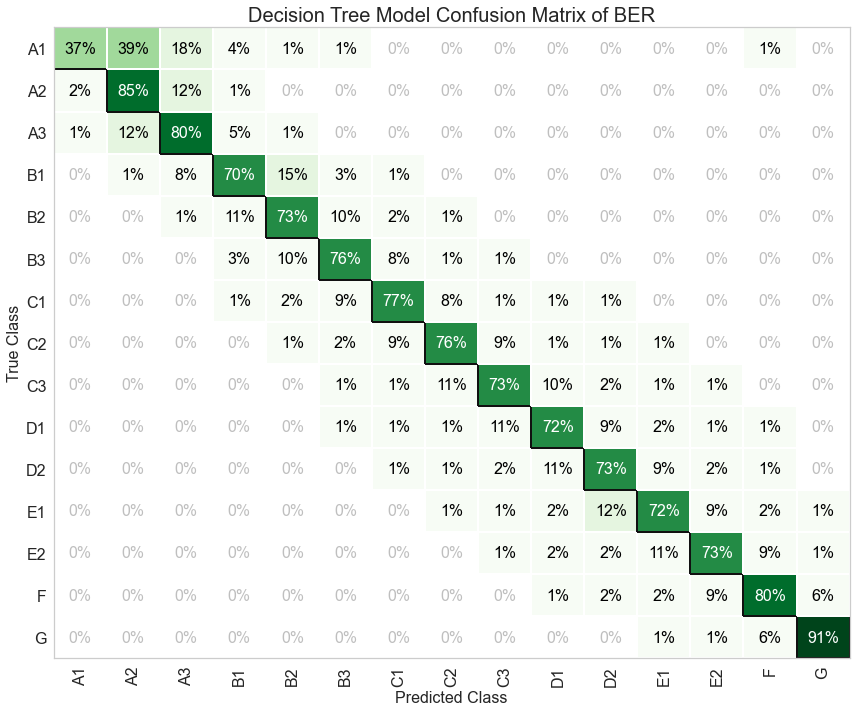

In [5]:
from matplotlib import cm as col
import matplotlib
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 16
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix')
viridis = col.get_cmap('viridis', 15)
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    model, classes=classes,
    percent=True,
    cmap='Greens',
    fontsize=16,
    title='Decision Tree Model Confusion Matrix of BER'
    ,
    #label_encoder={0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

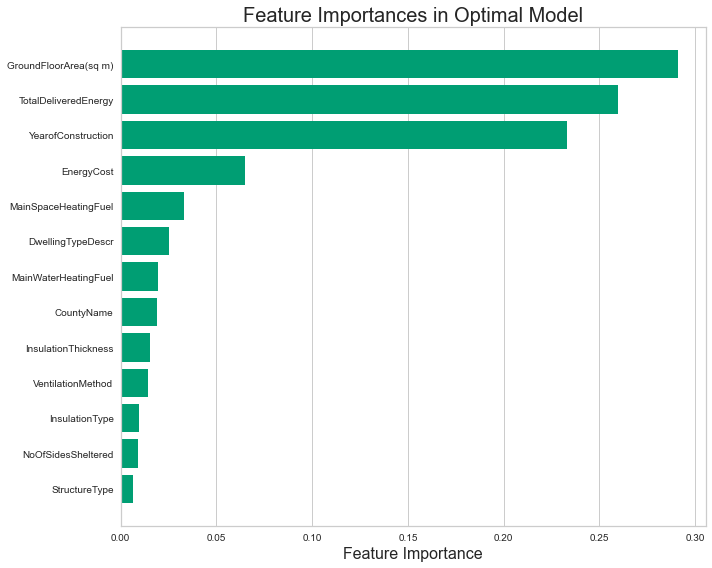

In [6]:
from yellowbrick.model_selection import FeatureImportances
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.xlabel('Feature Importance')
visualizer_FI = FeatureImportances(model, labels=features, relative=False, colors=['#009E73'], title = 'Feature Importances in Optimal Model', xlabel='Feature Importance')
visualizer_FI.fit(X_train, y_train)
visualizer_FI.show();

In [4]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1) * 100

array([36.2244898 , 87.60346487, 86.7726411 , 74.50414713, 78.1575991 ,
       84.02925532, 82.12619468, 80.23432682, 77.27331467, 77.22468917,
       78.78146925, 76.91552063, 77.47097938, 83.57088456, 93.39352897])

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       196
           1       0.89      0.88      0.89      5195
           2       0.88      0.87      0.88      6857
           3       0.65      0.74      0.69      2773
           4       0.75      0.78      0.77      6231
           5       0.82      0.84      0.83     15040
           6       0.85      0.83      0.84     22077
           7       0.84      0.80      0.82     24325
           8       0.81      0.78      0.79     23215
           9       0.80      0.77      0.79     22520
          10       0.79      0.78      0.79     19384
          11       0.68      0.77      0.72     11198
          12       0.71      0.77      0.74      8873
          13       0.77      0.83      0.80      9191
          14       0.94      0.93      0.94     13290

    accuracy                           0.81    190365
   macro avg       0.78      0.79      0.78    190365
weighted avg       0.81   